In [32]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 250


In [34]:
df = pd.read_csv('data.csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [35]:
df2 = pd.read_json('data.json')
df2.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.6 KB


In [47]:
x_mean  = df2["Calories"].mean()
x_median = df2["Calories"].median()
x_std = df2["Calories"].std()

x_mean, x_median, x_std

(375.79999999999995, 318.6, 266.3771340524788)

In [48]:
df2.fillna({"Calories": x_mean}, inplace=True)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  169 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.6 KB


In [52]:
df2.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.800000
std,42.299949,14.510259,16.450434,262.383248
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [53]:
for x in df.index:
    if df.loc[x, "Duration"] >= 120:
        df.loc[x, "Duration"] = df.loc[x, "Duration"] / 60  # convert to hours

/var/folders/7f/xrny7_8d32q6xy6nps28xn8m0000gn/T/ipykernel_50536/3962316337.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[x, "Duration"] = df.loc[x, "Duration"] / 60  # convert to hours


In [54]:
df2.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.800000
std,42.299949,14.510259,16.450434,262.383248
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [61]:
df2.duplicated().sum()
df2.drop_duplicates(inplace=True)

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  163 non-null    int64  
 1   Pulse     163 non-null    int64  
 2   Maxpulse  163 non-null    int64  
 3   Calories  163 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [63]:
df2.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.161642,0.004089,0.921811
Pulse,-0.161642,1.000000,0.787348,0.016352
Maxpulse,0.004089,0.787348,1.000000,0.195119
Calories,0.921811,0.016352,0.195119,1.000000


<Axes: xlabel='Duration', ylabel='Calories'>

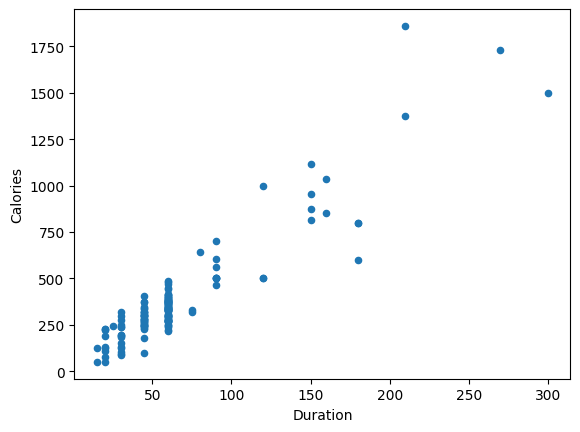

In [65]:
df2.plot(kind='scatter', x='Duration', y='Calories')

<Axes: ylabel='Frequency'>

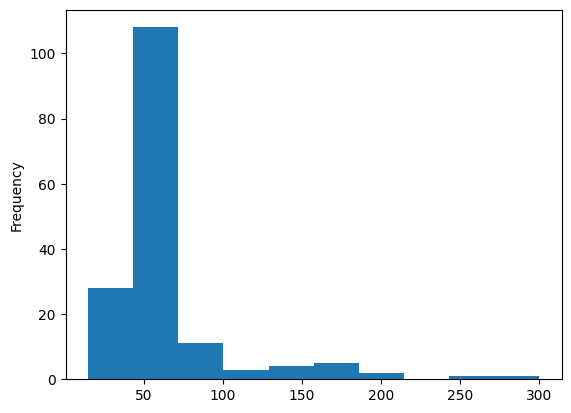

In [66]:
df2['Duration'].plot(kind='hist', bins=10)

In [67]:
df2.loc[0]

Duration     60.0
Pulse       110.0
Maxpulse    130.0
Calories    409.1
Name: 0, dtype: float64

In [ ]:
df.drop_duplicates

In [1]:
from scipy.stats import binom

In [ ]:
from scipy.stats import binom
n = 10
p = 0.9

for k, index in enumerate(range(n + 1)):
    probability = binom.pmf(k, n, p)
    print(index, probability)

0 9.999999999999981e-11
1 8.999999999999986e-09
2 3.644999999999997e-07
3 8.747999999999995e-06
4 0.00013778099999999982
5 0.0014880347999999988
6 0.011160261000000001
7 0.05739562799999998
8 0.1937102445
9 0.387420489
10 0.3486784401000001


In [8]:
# variable for 8 succeses or fewer
probability = binom.cdf(8, n, p)
probability

0.2639010708999999

In [ ]:
# Looking at the beta distribution, to see how well it fits the binomial distribution.
from scipy.stats import beta
import matplotlib.pyplot as plt

a = 8
b = 2 

p = beta.cdf(0.9, a, b)
print(p)

# according to our calculation, there is a 77.48% chance the underlying probability
# of success is 90% or less.

0.7748409780000002


In [13]:
# How do we calculate the probability of success being 90% or more as shaded in

# Looking at the beta distribution, to see how well it fits the binomial distribution.
from scipy.stats import beta
import matplotlib.pyplot as plt

a = 8
b = 2 

p = 1 - beta.cdf(0.9, a, b)
print(p)

# This means that out of 8/10 successful engine tests, there is only a 22.5% chance the
# underlying success rate is 90% or greater. But there is about a 77.5% chance it is less
# than 90%.

0.22515902199999982


In [ ]:
from scipy.stats import binom
n = 137
p = .40

p_50_or_more_noshows = 0.0

for x in range(50, 138):
    p_50_or_more_noshows += binom.pmf(x, n, p)
print(p_50_or_more_noshows) # 0.822095588147425

0.822095588147425


In [20]:
from scipy.stats import binom
n = 137
p = 0.4

for k, index in enumerate(range(50, n + 1)):
    probability = binom.pmf(k, n, p)
    print(index, probability)

50 4.0431634869268745e-31
51 3.692755984726615e-29
52 1.674049379742726e-27
53 5.022148139228156e-26
54 1.1216130844276256e-24
55 1.98899386971832e-23
56 2.917191008920154e-22
57 3.6395430682718256e-21
58 3.9428383239611745e-20
59 3.7676010651184214e-19
60 3.2150195755677255e-18
61 2.4745908248309488e-17
62 1.7322135773816395e-16
63 1.1103933188343837e-15
64 6.556608168355481e-15
65 3.584279132034323e-14
66 1.8220085587841108e-13
67 8.645609239720599e-13
68 3.842492995431447e-12
69 1.6044093559871392e-11
70 6.310676800216089e-11
71 2.3439656686516943e-10
72 8.239394471624191e-10
73 2.7464648238747258e-09
74 8.697138608936645e-09
75 2.6207377674928934e-08
76 7.5262212810053e-08
77 2.0627421288681053e-07
78 5.402419861321209e-07
79 1.3537098043310705e-06
80 3.2489035303945787e-06
81 7.475971564563883e-06
82 1.6509437205078575e-05
83 3.502001831380291e-05
84 7.1413370679127e-05
85 0.00014010623199904986
86 0.0002646451048870933
87 0.0004816064070918266
88 0.0008449235212137282
89 0.001429

In [25]:
cumulative_probability = binom.cdf(50, n+1, p)
print("Cumulative probability of 50 or fewer passengers not showing up:", cumulative_probability)

Cumulative probability of 50 or fewer passengers not showing up: 0.20765545462118776


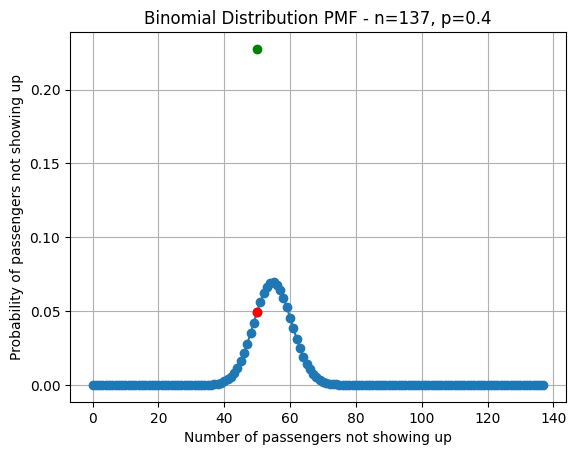

In [11]:
# create a plot
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, n + 1)
y = binom.pmf(x, n, p)
plt.plot(x, y, 'o-')
plt.plot(50, binom.pmf(50, n, p), 'ro')
plt.plot(50, binom.cdf(50, n, p), 'go')
plt.title('Binomial Distribution PMF - n=137, p=0.4')
plt.xlabel('Number of passengers not showing up')
plt.ylabel('Probability of passengers not showing up')
plt.grid()
plt.show()

In [26]:
# Looking at the beta distribution, to see how well it fits the binomial distribution.
from scipy.stats import beta
import matplotlib.pyplot as plt

a = 8
b = 2

p = 1 - beta.cdf(0.5, a, b)
print(p)

# according to our calculation, there is a 0,3% chance the underlying probability of succes is fair, since a a fair coin concides with p=0.5

0.98046875


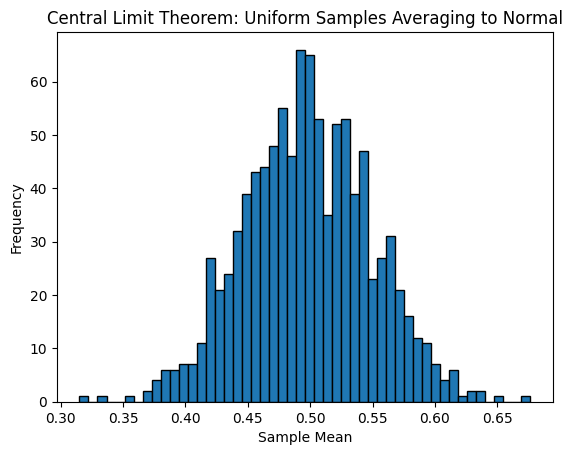

In [32]:
# Samples of the uniform distribution will average out to a normal distribution.
import random
import matplotlib.pyplot as plt

sample_size = 31
sample_count = 1000

# Central limit theorem, 1000 samples each with 31
x_values = [(sum([random.uniform(0.0, 1.0) for i in range(sample_size)]) / sample_size)
            for _ in range(sample_count)]

plt.hist(x_values, bins=50, edgecolor='black')
plt.title('Central Limit Theorem: Uniform Samples Averaging to Normal')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()  

You bought a spool of 1.75 mm filament for your 3D printer. You want to
measure how close the filament diameter really is to 1.75 mm. You use a caliper
tool and sample the diameter five times on the spool:

1.78, 1.75, 1.72, 1.74, 1.77

Calculate the mean and standard deviation for this set of values.

In [1]:
import numpy as np

arr = np.array([1.78, 1.75, 1.72, 1.74, 1.77])

arr.mean(), arr.std()

(1.752, 0.02135415650406264)

A manufacturer says the Z-Phone smart phone has a mean consumer life of 42
months with a standard deviation of 8 months. Assuming a normal distribution,
what is the probability a given random Z-Phone will last between 20 and 30
months?

In [2]:
from scipy.stats import norm

mean = 42

std_dev = 8

x = norm.cdf(30, mean, std_dev) - norm.cdf(20, mean, std_dev)

x

0.0638274380338035

I am skeptical that my 3D printer filament is not 1.75 mm in average diameter
as advertised. I sampled 34 measurements with my tool. The sample mean is
1.715588 and the sample standard deviation is 0.029252.
What is the 99% confidence interval for the mean of my entire spool of filament?

- BEFORE assignemnet => Mean: 1.752 STD: 0.02135415650406264



The sample mean is 1.715588 

sample standard deviation is 0.029252.

In [5]:
from scipy.stats import norm
def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

print(critical_z_value(p=.95))
# (-1.959963984540054, 1.959963984540054)
print(critical_z_value(p=0.99))
# (-2.5758293035489004, 2.5758293035489004)

(-1.959963984540054, 1.959963984540054)
(-2.5758293035489004, 2.5758293035489004)


In [6]:
from math import sqrt
def confidence_interval(p, sample_mean, sample_std, n):
# Sample size must be greater than 30
    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / sqrt(n))
    upper_ci = upper * (sample_std / sqrt(n))
    return sample_mean + lower_ci, sample_mean + upper_ci

print(confidence_interval(p=.99, sample_mean=1.715588, sample_std=0.029252, n=34))

(1.7026658973748656, 1.7285101026251342)


In [ ]:
#“based on my sample of 34 3D PRINTERS
# with sample mean and sample standard deviation of , I am 99% confident
# the population mean lies between (1.7026658973748656, 1.7285101026251342)

Your marketing department has started a new advertising campaign and wants to
know if it affected sales, which in the past averaged $10,345 a day with a standard 
deviation of $552. The new advertising campaign ran for 45 days and averaged
$11,641 in sales.

Did the campaign affect sales? Why or why not? (Use a two-tailed test for more
reliable significance.)

In [20]:
from scipy.stats import norm

mean = 10345
std_dev = 552

p1 = 1.0 - norm.cdf(11641, mean, std_dev)

# Take advantage of symmetry

p2 = p1
# P-value of both tails
# I could have also just multiplied by 2

p_value = p1 + p2
print("Two-tailed P-value", p_value)
if p_value <= .05:
    print("Passes two-tailed test")
else:
    print("Fails two-tailed test")

Two-tailed P-value 0.01888333596496139
Passes two-tailed test
